# Naive Bayes

## Refactoring data

In [1]:
import os, glob
import re

def write_mess2file(messages_path, cur_file, mess_type = "train"):
    classes = []
    for mess_name in glob.glob(os.path.join(messages_path, '*.txt')):
        is_legit = 2
        legit_match = re.match(messages_path + r'/\d*legit\d*\.txt', mess_name)
        
        if legit_match:
            is_legit = 1
        
        if (mess_type == "train"):
            cur_file.write(str(is_legit) + " ")
        else:
            classes.append(is_legit)


        message = open(mess_name, "r")
        subj = message.readline().split()
        rest = message.read().split()
        
        subj_size = len(subj)
        rest_size = len(rest)
        cur_file.write(str(subj_size + rest_size - 1) + " ")
        
        for j in range(1, subj_size): 
            cur_file.write("-" + subj[j] + " ")
        
        for j in range(0, rest_size - 1):
            cur_file.write(rest[j] + " ")
        cur_file.write(rest[rest_size - 1] + "\n")

    return classes


def generate_test_part(test_part):
    file_path = '/home/vutaliy/prod/university-courses/MachineLearning/Bayes/test/test{0}'.format(test_part)
    cur_file = open(file_path, "w")
    # cur_file.write("2\n")

    # for i in range(len(penalties) - 1):
    #     cur_file.write(str(penalties[i]) + " ")
    # cur_file.write(str(penalties[len(penalties)-1]) + "\n")

    # cur_file.write(str(smooth_intense) + "\n")

    mess_count = 0
    test_mess_path = '/home/vutaliy/Downloads/messages/part{0}'.format(test_part)
    
    r, d, f = next(os.walk(test_mess_path))
    test_mess_count = len(f)
    
    for root,dirs,file_ in os.walk('/home/vutaliy/Downloads/messages'):
        mess_count += len(file_)
    cur_file.write(str(mess_count - 1 - test_mess_count) + "\n")

    for i in range(1, 11):
        messages_path = '/home/vutaliy/Downloads/messages/part{0}'.format(i)

        if i == test_part:
            continue
    
        write_mess2file(messages_path, cur_file)
    
    cur_file.write(str(test_mess_count) + "\n")
    classes = write_mess2file(test_mess_path, cur_file, mess_type = "test")

    cur_file.close()

    return classes

## Cpp import
```bash
cd src
g++ -c -fPIC "naiveBayes.cpp" -o "naiveBayes.o"
g++ -shared -Wl,-soname,"naiveBayes.so" -o "naiveBayes.so" "naiveBayes.o" 
```

## Primitive Bayes

In [2]:
import src.BayesCalling as bc

classes = []
def generate_test_files():
    for i in range(1,11):
        path_from = "/home/vutaliy/prod/university-courses/MachineLearning/Bayes/test/test{0}".format(i)
        classes.append(generate_test_part(i))
        print("generate test{0} is done".format(i))
        
generate_test_files()

generate test1 is done
generate test2 is done
generate test3 is done
generate test4 is done
generate test5 is done
generate test6 is done
generate test7 is done
generate test8 is done
generate test9 is done
generate test10 is done


## Smoothing parameter dependecy

In [3]:
all_accuracies = []
alphas = [1e-10, 1e-5, 1e-2, 1, 1e2]

def gen_all_test_parts(arr, call_type, best = 10e-10):
    path_to = "/home/vutaliy/prod/university-courses/MachineLearning/Bayes/ans"
    
    for i in range(1,11):
        path_from = "/home/vutaliy/prod/university-courses/MachineLearning/Bayes/test/test{0}".format(i)
        spam_pen = 1
        kekw = []

        for z in range(1, 4):
            accuracy_i = []
            for k in arr:
                matrix = [[0 for i in range(2)] for j in range(2)]
                accuracy = 0
                if call_type == "alphas":
                    bc.naive_bayes(z, path_from, path_to, best, spam_pen, k) 
                else:
                    bc.naive_bayes(z, path_from, path_to, k, spam_pen, best) 


                ans_file = open(path_to, "r")
                for j in range(len(classes[i-1])):
                    cur_obj = ans_file.readline().split()
                    
                    for k in range(len(cur_obj)):
                        cur_obj[k] = float(cur_obj[k])
                    predict_class = cur_obj.index(max(cur_obj)) + 1
                    # print(predict_class, classes[i-1][j], cur_obj)

                    if predict_class == classes[i-1][j]:
                        accuracy += 1
                    # matrix[predict_class - 1][classes[i-1][j] - 1] += 1
                
                accuracy /= len(classes[i-1])
                # accuracy = f_score(matrix, "macro")
                print(accuracy)
                accuracy_i.append(accuracy)
            print(z, " done")
            kekw.append(accuracy_i)
        
        all_accuracies.append(kekw)
        print(i, "done")


gen_all_test_parts(alphas, "alphas")
all_accuracies

0.981651376146789
0.9908256880733946
0.981651376146789
0.963302752293578
0.5596330275229358
1  done
0.9908256880733946
0.9908256880733946
0.9541284403669725
0.7981651376146789
0.5596330275229358
2  done
0.963302752293578
0.9724770642201835
0.9174311926605505
0.6422018348623854
0.5504587155963303
3  done
1 done
0.981651376146789
0.981651376146789
0.9908256880733946
0.9908256880733946
0.5596330275229358
1  done
0.981651376146789
0.9908256880733946
0.9357798165137615
0.7522935779816514
0.5596330275229358
2  done
0.944954128440367
0.926605504587156
0.9174311926605505
0.6422018348623854
0.5596330275229358
3  done
2 done
0.981651376146789
0.9724770642201835
0.9724770642201835
0.944954128440367
0.5596330275229358
1  done
0.9724770642201835
0.9541284403669725
0.9174311926605505
0.8073394495412844
0.5596330275229358
2  done
0.9357798165137615
0.9357798165137615
0.8990825688073395
0.6697247706422018
0.5688073394495413
3  done
3 done
1.0
1.0
0.9908256880733946
0.963302752293578
0.5596330275229358

[[[0.981651376146789,
   0.9908256880733946,
   0.981651376146789,
   0.963302752293578,
   0.5596330275229358],
  [0.9908256880733946,
   0.9908256880733946,
   0.9541284403669725,
   0.7981651376146789,
   0.5596330275229358],
  [0.963302752293578,
   0.9724770642201835,
   0.9174311926605505,
   0.6422018348623854,
   0.5504587155963303]],
 [[0.981651376146789,
   0.981651376146789,
   0.9908256880733946,
   0.9908256880733946,
   0.5596330275229358],
  [0.981651376146789,
   0.9908256880733946,
   0.9357798165137615,
   0.7522935779816514,
   0.5596330275229358],
  [0.944954128440367,
   0.926605504587156,
   0.9174311926605505,
   0.6422018348623854,
   0.5596330275229358]],
 [[0.981651376146789,
   0.9724770642201835,
   0.9724770642201835,
   0.944954128440367,
   0.5596330275229358],
  [0.9724770642201835,
   0.9541284403669725,
   0.9174311926605505,
   0.8073394495412844,
   0.5596330275229358],
  [0.9357798165137615,
   0.9357798165137615,
   0.8990825688073395,
   0.6697247

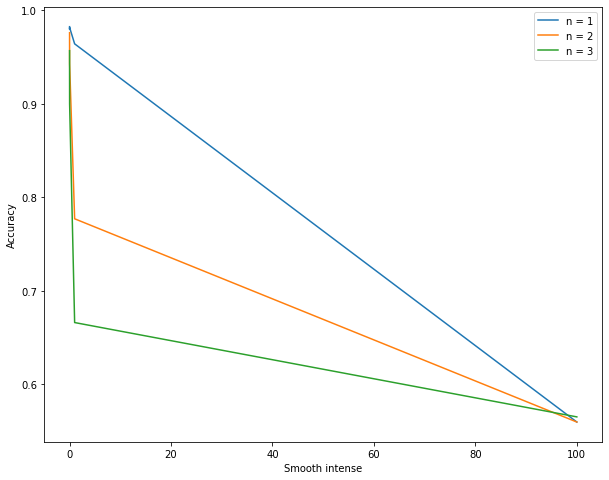

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

check = sum(np.array(all_accuracies)) / len(all_accuracies)

fig, ax = plt.subplots()

plt.xlabel('Smooth intense: 1e-10 * (10 **i)')
plt.ylabel('Accuracy')
plt.plot([0,5,8,10,12], check[0], label = "n = 1")
plt.plot([0,5,8,10,12], check[1], label = "n = 2")
plt.plot([0,5,8,10,12], check[2], label = "n = 3")

ax.legend()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

## Dependency of penalty for legit message

In [ ]:
legit_pens = [1e-10 * (10 ** i) for i in range(10)]
gen_all_test_parts(legit_pens, "legits")
all_accuracies

In [ ]:
check2 = sum(np.array(all_accuracies)) / len(all_accuracies)
lp = [i for i in range(10)]
fig, ax = plt.subplots()


plt.xlabel('Legit penalty: 1e-10 * (10 **i)')
plt.ylabel('Accuracy')
plt.plot(lp, check[0], label = "n = 1")
plt.plot(lp, check[1], label = "n = 2")
plt.plot(lp, check[2], label = "n = 3")

ax.legend()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()


## ROC plot

In [ ]:
import sklearn.metrics as metrics

def roc_plot(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
preds = []

def results(test = 1e-10):
    path_to = "/home/vutaliy/prod/university-courses/MachineLearning/Bayes/ans"
    
    for i in range(1,11):
        path_from = "/home/vutaliy/prod/university-courses/MachineLearning/Bayes/test/test{0}".format(i)
        spam_pen = 1
        # buff = []

        bc.naive_bayes(z, path_from, path_to, best, spam_pen, best) 

        ans_file = open(path_to, "r")
        for j in range(len(classes[i-1])):
            cur_obj = ans_file.readline().split()
                    
            for k in range(len(cur_obj)):
                cur_obj[k] = float(cur_obj[k])
            predict_class = cur_obj.index(max(cur_obj)) + 1
            # buff.append(predict_class)
                
            preds.append(buff)

results()
merge_classes = [j for i in classes for j in i]


In [ ]:
roc_plot(merge_classes, preds)